In [2]:
import modin.pandas as pd
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('loan.csv')

In [4]:
df.shape

(2260668, 145)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260663,NaN,NaN,12000,12000,12000.0,60 months,14.08,279.72,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260664,NaN,NaN,12000,12000,12000.0,60 months,25.82,358.01,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260665,NaN,NaN,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260666,NaN,NaN,12000,12000,12000.0,60 months,21.45,327.69,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260667,NaN,NaN,16550,16550,16550.0,60 months,21.45,451.94,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(df.isnull().sum())

id                       2260668
member_id                2260668
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        2227612
settlement_date          2227612
settlement_amount        2227612
settlement_percentage    2227612
settlement_term          2227612
Length: 145, dtype: int64


In [8]:
df.isin([' ','NULL', nan]).mean()

id                       1.000000
member_id                1.000000
loan_amnt                0.000000
funded_amnt              0.000000
funded_amnt_inv          0.000000
                           ...   
settlement_status        0.985378
settlement_date          0.985378
settlement_amount        0.985378
settlement_percentage    0.985378
settlement_term          0.985378
Length: 145, dtype: float64

In [9]:
df = df.loc[:, df.isin([' ','NULL', nan]).mean() < 0.7]

In [10]:
df.shape

(2260668, 105)

In [11]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object', length=105)

In [12]:
df.loc[:,['delinq_2yrs','mths_since_last_delinq', 'acc_now_delinq']]

,delinq_2yrs,mths_since_last_delinq,acc_now_delinq
0,0.0,NaN,0.0
1,0.0,71.0,0.0
2,0.0,NaN,0.0
3,0.0,NaN,0.0
4,0.0,NaN,0.0
...,...,...,...
2260663,0.0,NaN,0.0
2260664,3.0,13.0,0.0
2260665,0.0,NaN,0.0
2260666,2.0,7.0,0.0


In [13]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
                              ...  
total_bc_limit                50030
total_il_high_credit_limit    70276
hardship_flag                     0
disbursement_method               0
debt_settlement_flag              0
Length: 105, dtype: int64

In [14]:
df2 = df.loc[:, ['loan_amnt', 'issue_d']]

In [15]:
df2.head()

,loan_amnt,issue_d
0,2500,Dec-2018
1,30000,Dec-2018
2,5000,Dec-2018
3,4000,Dec-2018
4,30000,Dec-2018


In [16]:
df2['Time'] = pd.to_datetime(df2.issue_d)

To request implementation, send an email to feature_requests@modin.org.


In [17]:
df2['Month'] = df2.Time.dt.month

In [18]:
df2['Year'] = df2.Time.dt.year

In [19]:
df2['Year'].value_counts()

2018    495242
2017    443579
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
dtype: int64

In [20]:
df2['Interest_Rate'] = df.int_rate

In [21]:
df2['loan_status'] = df.loan_status
df2['grade'] = df.grade

In [22]:
df2.sort_values(['Year','Month'], axis=0,  ascending=[True, True], inplace=True)

In [23]:
df2.head(50)

,loan_amnt,issue_d,Time,Month,Year,Interest_Rate,loan_status,grade
2139270,7500,Jun-2007,2007-06-01,6,2007,13.75,Fully Paid,E
2141997,6000,Jun-2007,2007-06-01,6,2007,10.59,Does not meet the credit policy. Status:Fully ...,C
2141998,4400,Jun-2007,2007-06-01,6,2007,9.64,Does not meet the credit policy. Status:Fully ...,B
2141999,1200,Jun-2007,2007-06-01,6,2007,9.01,Does not meet the credit policy. Status:Fully ...,B
2142000,5000,Jun-2007,2007-06-01,6,2007,11.22,Does not meet the credit policy. Status:Fully ...,C
2142001,1400,Jun-2007,2007-06-01,6,2007,10.91,Does not meet the credit policy. Status:Fully ...,C
2142002,1000,Jun-2007,2007-06-01,6,2007,14.07,Does not meet the credit policy. Status:Fully ...,E
2142003,5000,Jun-2007,2007-06-01,6,2007,7.75,Does not meet the credit policy. Status:Fully ...,A
2142004,2500,Jun-2007,2007-06-01,6,2007,7.43,Does not meet the credit policy. Status:Fully ...,A
2142005,3000,Jun-2007,2007-06-01,6,2007,7.43,Does not meet the credit policy. Status:Fully ...,A


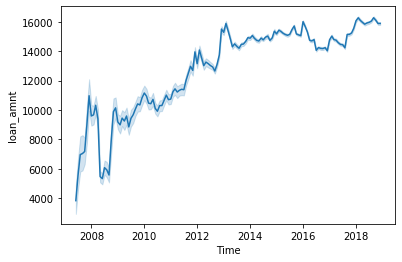

In [24]:
sns.lineplot(x='Time', y='loan_amnt', data = df2)

In [25]:
df2[(df2.Year > 2007) & (df2.Year < 2015)]

,loan_amnt,issue_d,Time,Month,Year,Interest_Rate,loan_status,grade
2138812,2500.0,Jan-2008,2008-01-01,1.0,2008.0,8.38,Fully Paid,A
2138815,2900.0,Jan-2008,2008-01-01,1.0,2008.0,8.00,Fully Paid,A
2138816,800.0,Jan-2008,2008-01-01,1.0,2008.0,7.37,Fully Paid,A
2138829,500.0,Jan-2008,2008-01-01,1.0,2008.0,10.71,Fully Paid,B
2138830,3200.0,Jan-2008,2008-01-01,1.0,2008.0,8.63,Fully Paid,A
...,...,...,...,...,...,...,...,...
1894645,12000.0,Dec-2014,NaT,NaN,NaN,6.03,Fully Paid,A
1895133,18000.0,Dec-2014,NaT,NaN,NaN,8.67,Charged Off,B
1896333,22750.0,Dec-2014,NaT,NaN,NaN,24.50,Fully Paid,F
1896367,4500.0,Dec-2014,NaT,NaN,NaN,14.99,Fully Paid,C


In [26]:
def loanDist(x,y):
    temp_df = df2[(df2.Year >= x) & (df2.Year <=y)]
    vis = sns.lineplot(x='issue_d', y='loan_amnt', sort = False, data = temp_df)
    plt.xticks(
    rotation=70, 
    fontweight='light',
    fontsize='large')
    plt.savefig('loanDist.png')

In [27]:
def intDist(x,y):
    temp_df = df2[(df2.Year >= x) & (df2.Year <=y)]
    vis = sns.lineplot(x='issue_d', y='Interest_Rate', sort = False, data = temp_df)
    plt.xticks(
    rotation=70, 
    fontweight='light',
    fontsize='large')
    plt.savefig('interestDist.png',)

In [28]:
def avgIntDist(x,y):
    temp_df = df2[(df2.Year >= x) & (df2.Year <=y)]
    vis = sns.lineplot(x='issue_d', y='Interest_Rate', sort = False, estimator = 'mean', ci='sd', data = temp_df)
    plt.xticks(
    rotation=70, 
    fontweight='light',
    fontsize='large')
    plt.savefig('AvgIntDist.png',)

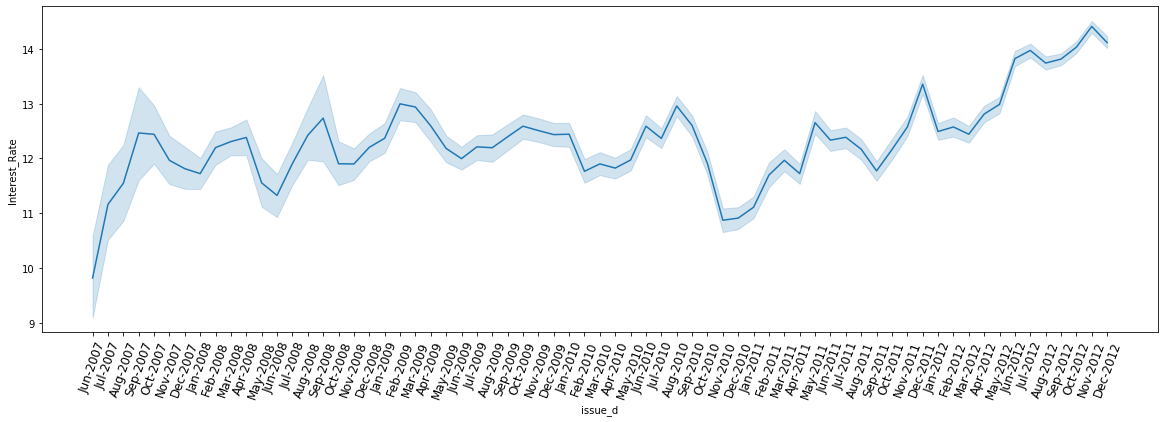

In [29]:
plt.figure(figsize=(20,6))
intDist(2007, 2012)

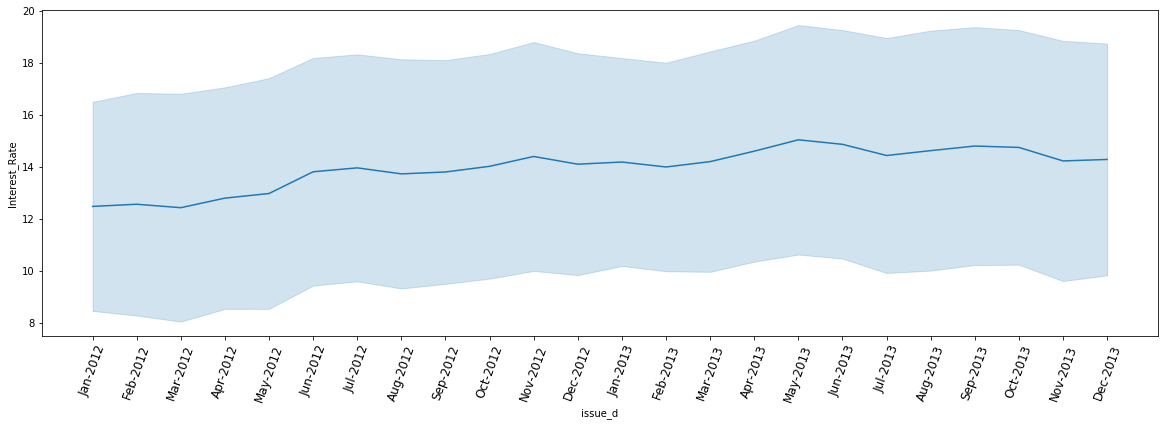

In [30]:
plt.figure(figsize=(20,6))
avgIntDist(2012,2013)

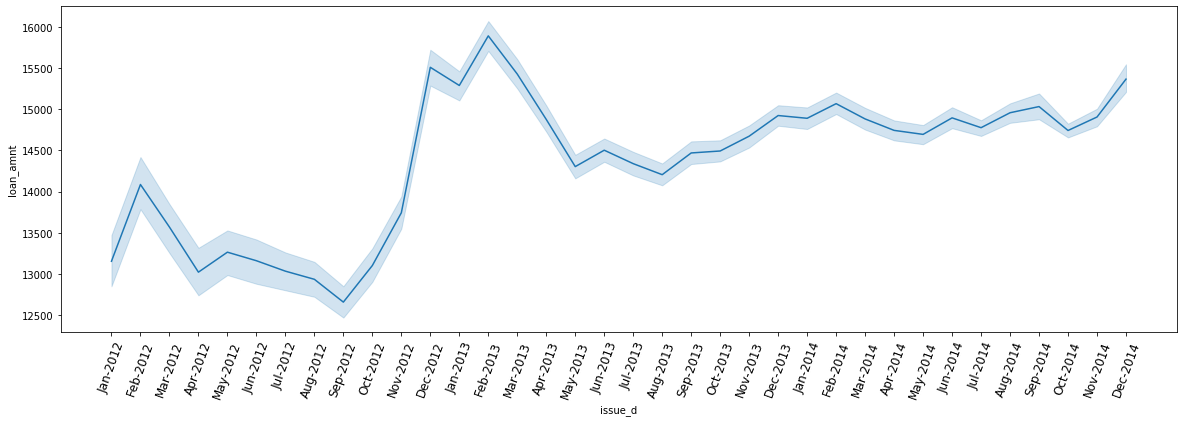

In [31]:
plt.figure(figsize=(20,6))
loanDist(2012, 2014)

In [32]:
df2.Interest_Rate[df2.issue_d == 'May-2013'].mean()

15.048984541062232

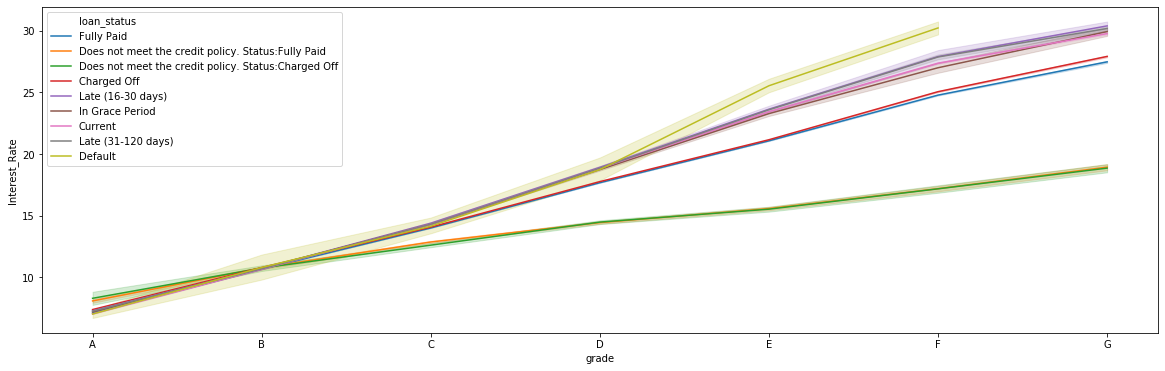

In [33]:
plt.figure(figsize=(20,6))
sns.lineplot(x="grade", y="Interest_Rate", hue="loan_status", data=df2)

In [34]:
def intGradeStatus(x):
    temp_df = df2[(df2.Year == x)]
    vis = sns.scatterplot(x='grade', y='Interest_Rate', hue="loan_status", data = temp_df)
    plt.xticks(
    rotation=70, 
    fontweight='light',
    fontsize='large')
    plt.savefig('intGradeStatus.png',)

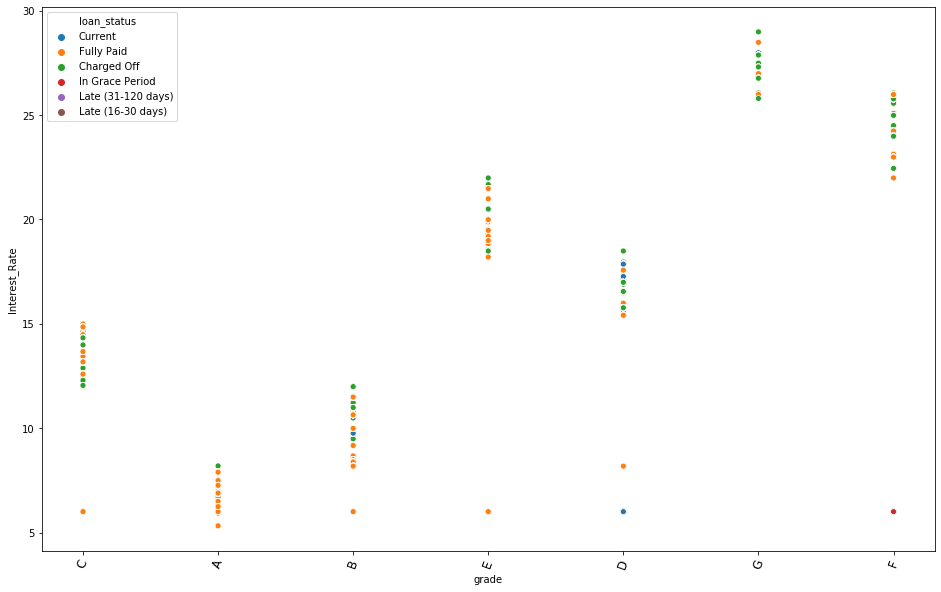

In [35]:
plt.figure(figsize=(16,10))
intGradeStatus(2015)

In [36]:
df.loc[df.addr_state == 'WY']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
1241,10000,10000,10000.0,60 months,15.02,238.01,C,C3,Foreman,< 1 year,...,0.0,0.0,0.0,104818.0,6836.0,15000.0,0.0,N,Cash,N
1749,10000,10000,10000.0,36 months,8.19,314.25,A,A4,Registered nurse,4 years,...,77.8,0.0,0.0,246972.0,44106.0,35500.0,37762.0,N,Cash,N
2113,16000,16000,16000.0,60 months,13.56,368.66,C,C1,Deputy County Attorney,2 years,...,20.0,0.0,0.0,434880.0,148545.0,6500.0,152859.0,N,Cash,N
2296,19000,19000,19000.0,36 months,10.33,616.03,B,B1,conductor/engineer,10+ years,...,66.7,1.0,0.0,98585.0,66770.0,26200.0,64885.0,N,DirectPay,N
2914,25000,25000,24950.0,60 months,24.37,724.58,E,E2,Program manager,9 years,...,11.1,0.0,0.0,104500.0,22902.0,103000.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259714,7200,7200,7200.0,36 months,7.21,223.01,A,A3,Sales manager,7 years,...,0.0,1.0,0.0,27800.0,8012.0,10800.0,5000.0,N,Cash,N
2259790,5000,5000,5000.0,36 months,14.08,171.09,C,C3,Education Writer/Marketing Blogger,2 years,...,50.0,0.0,0.0,189428.0,204698.0,1200.0,186528.0,N,Cash,N
2259895,6000,6000,6000.0,36 months,5.32,180.69,A,A1,Principal,10+ years,...,0.0,0.0,0.0,567093.0,85029.0,33000.0,142293.0,N,Cash,N
2260149,35000,35000,35000.0,36 months,9.93,1128.21,B,B2,Operations Manager,10+ years,...,33.3,0.0,0.0,157671.0,81078.0,29800.0,53871.0,N,Cash,N


In [58]:
new_df = pd.crosstab(df["addr_state"], df['loan_status'])

In [59]:
new_df.columns

Index(['Charged Off', 'Current', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'],
      dtype='object', name='col_0')

In [60]:
new_df['totalChargedOff'] = new_df['Charged Off'] + new_df['Does not meet the credit policy. Status:Charged Off']

In [61]:
new_df.head()

,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),totalChargedOff
row_0,,,,,,,,,,
AK,617,2051,0,1,4,2480,24,8,46,618
AL,3828,10651,1,8,24,12301,110,50,311,3836
AR,2346,7061,0,6,9,7362,61,38,191,2352
AZ,6241,21241,0,18,33,25475,179,78,512,6259
CA,37653,118612,4,101,223,153379,1087,540,2934,37754


In [62]:
new_df.drop(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'], axis = 1, inplace = True)

In [63]:
new_df.head()

,Current,Default,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),totalChargedOff
row_0,,,,,,,,
AK,2051,0,4,2480,24,8,46,618
AL,10651,1,24,12301,110,50,311,3836
AR,7061,0,9,7362,61,38,191,2352
AZ,21241,0,33,25475,179,78,512,6259
CA,118612,4,223,153379,1087,540,2934,37754


In [64]:
new_df['All'] = new_df.sum(axis = 1)

In [65]:
new_df.head()

,Current,Default,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),totalChargedOff,All
row_0,,,,,,,,,
AK,2051,0,4,2480,24,8,46,618,5231
AL,10651,1,24,12301,110,50,311,3836,27284
AR,7061,0,9,7362,61,38,191,2352,17074
AZ,21241,0,33,25475,179,78,512,6259,53777
CA,118612,4,223,153379,1087,540,2934,37754,314533


In [66]:
new_df.drop(['Current', 'Default', 'Does not meet the credit policy. Status:Fully Paid','Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'], axis = 1, inplace = True)

In [67]:
new_df['Probability Charged Off'] = round((new_df['totalChargedOff']/new_df['All']),3)

In [68]:
new_df.iloc[0:2]
# new_df.head()

,totalChargedOff,All,Probability Charged Off
row_0,,,
AK,618,5231,0.118
AL,3836,27284,0.141


In [69]:
new_df.reset_index(level=0, inplace=True)

In [70]:
new_df.head()

,row_0,totalChargedOff,All,Probability Charged Off
0,AK,618,5231,0.118
1,AL,3836,27284,0.141
2,AR,2352,17074,0.138
3,AZ,6259,53777,0.116
4,CA,37754,314533,0.120


In [71]:
new_df.rename(columns = {'row_0': 'addr_state'}, inplace = True)

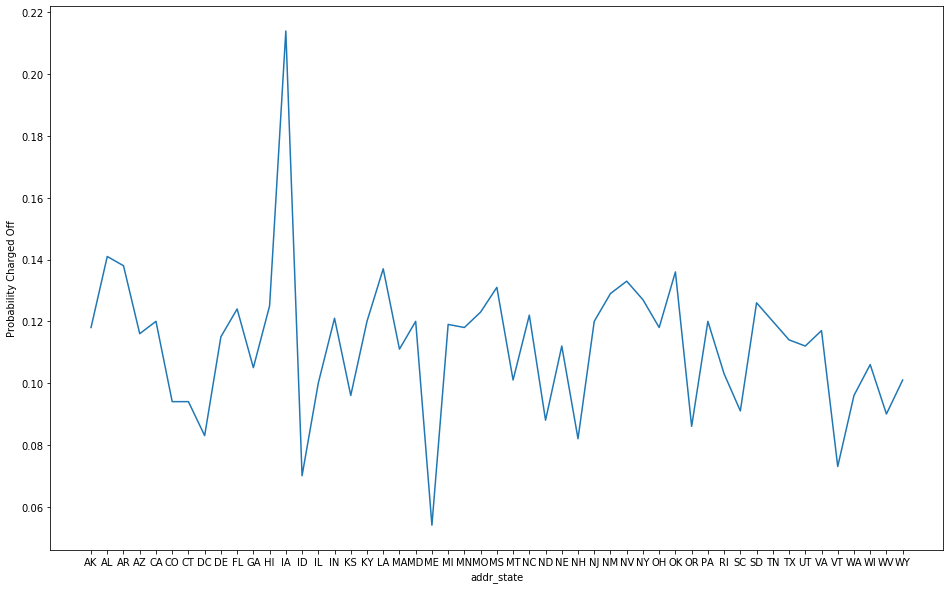

In [72]:
plt.figure(figsize=(16,10))
sns.lineplot(x="addr_state", y="Probability Charged Off", data=new_df)

In [73]:
def chargedOffState():
    vis = sns.lineplot(x="addr_state", y="Probability Charged Off", markers = True, data=new_df)
    plt.xticks(
    rotation=90, 
    fontweight='light',
    fontsize='large')
    plt.savefig('chargedOffState.png',)

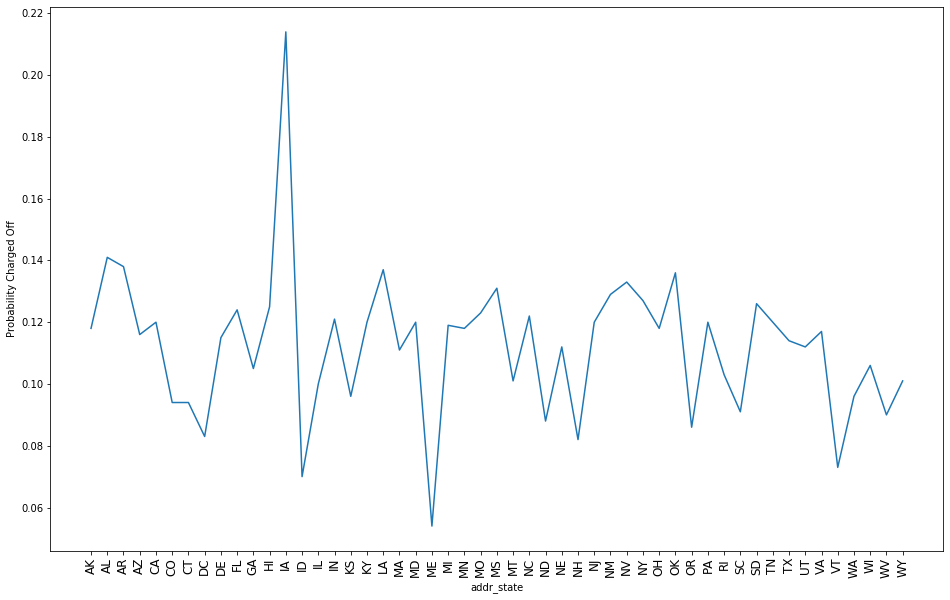

In [74]:
plt.figure(figsize=(16,10))
chargedOffState()